<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 10px; background-color: #2c2c2c; font-size:115%; text-align:left">
<h3 align="left"><font color='orange'>Table of Contents:</font></h3>

* [Step 1 | Import Libraries](#import)
* [Step 2 | Loading the Dataset](#load)
* [Step 3 | EDA](#explore)
    - [Step 3.1 | Dataset basic Information](#basic)
    - [Step 3.2 | Missing Values](#missing)
    - [Step 3.3 | Duplicated Values](#duplicated)
    - [Step 3.4 | Univariate Analysis](#univariate)
    - [Step 3.5 | Bivariate Analysis](#bivariate)
    - [Step 3.6 | Multivariate Analysis](#multivariate)
* [Step 4 | Data Preprocessing](#preprocessing)
    - [Step 4.1 | Features Encoding](#encoding)
    - [Step 4.2 | Missing Value Handling](#imputation)
    - [Step 4.3 | Data Transformation](#transform)
    - [Step 4.4 | Data Reduction](#reduce)
    - [Step 4.5 | Outlier Treatment](#outlier)
    - [Step 4.5 | Insights and Recommendations](#insight)

<a id="import"></a>
# Importing Libraries
⬆️ [Tabel of Contents](#contents_tabel)


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import os
import warnings
from utils import count_plot,plot_crosstab,cross_tab_features


In [120]:
#suppress all warnings
warnings.filterwarnings("ignore")

<a id='load'></a>
# Loading Data Set
⬆️ [Tabel of Contents](#contents_tabel)

In [121]:
#using locally stored dataset
df=pd.read_csv('data/RTA Dataset.csv')

In [122]:
#load the data from the github repo
# df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [123]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


<a id='explore'></a>
# Exploratory Data Analysis
⬆️ [Tabel of Contents](#contents_tabel)

<a id='basic'></a>
### <i>Dataset Basic Information</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [124]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Changing lane to the right,Slight Injury


In [125]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [126]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7552,0:10:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Over 51,3,Driver,Normal,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Moving Backward,Slight Injury
7500,8:45:00,Wednesday,Unknown,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Organization,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10015,19:20:00,Sunday,31-50,Male,Junior high school,Employee,Above 10yr,Stationwagen,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
5054,13:38:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Passenger,Female,Over 51,3,NaN,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
1267,17:35:00,Monday,18-30,Male,NaN,NaN,NaN,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
8780,8:14:00,Wednesday,31-50,Male,High school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Improper parking,Slight Injury
8216,20:15:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Long lorry,Owner,NaN,...,Going straight,Pedestrian,Male,31-50,2,NaN,NaN,Unknown or other,Moving Backward,Serious Injury
512,20:41:00,Thursday,31-50,Male,Junior high school,Owner,1-2yr,Motorcycle,Owner,2-5yrs,...,Reversing,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
7081,14:35:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Stopping,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
7167,19:42:00,Friday,Under 18,Male,Junior high school,NaN,Below 1yr,Other,Owner,1-2yr,...,Going straight,na,na,na,na,Driver,Blind,Not a Pedestrian,Driving carelessly,Slight Injury


In [127]:
df.shape

(12316, 32)

In [128]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### Rename Columns- use small letters for column names

In [129]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [130]:
df.rename(columns=col_map,inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [132]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [133]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<a id='missing'></a>
<b>Missing Values</b>
⬆️ [Tabel of Contents](#contents_tabel)

In [134]:
#number of missing values in each column & Missing values in percentage
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]
missing_values=pd.DataFrame(df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0],columns=['#missing_values'])
print(missing_values.shape)
missing_values['percentage']=missing_percentages[missing_percentages>0].apply(lambda x: f"{x:.2f}%")
missing_values


(16, 1)


,#missing_values,percentage
vehicle_defect,4427,35.95%
service_year,3928,31.89%
casualty_work,3198,25.97%
casualty_fitness,2635,21.39%
vehicle_type,950,7.71%
junction_type,887,7.20%
driving_experience,829,6.73%
educational_level,741,6.02%
vehicle_driver_relation,579,4.70%
vehicle_owner,482,3.91%


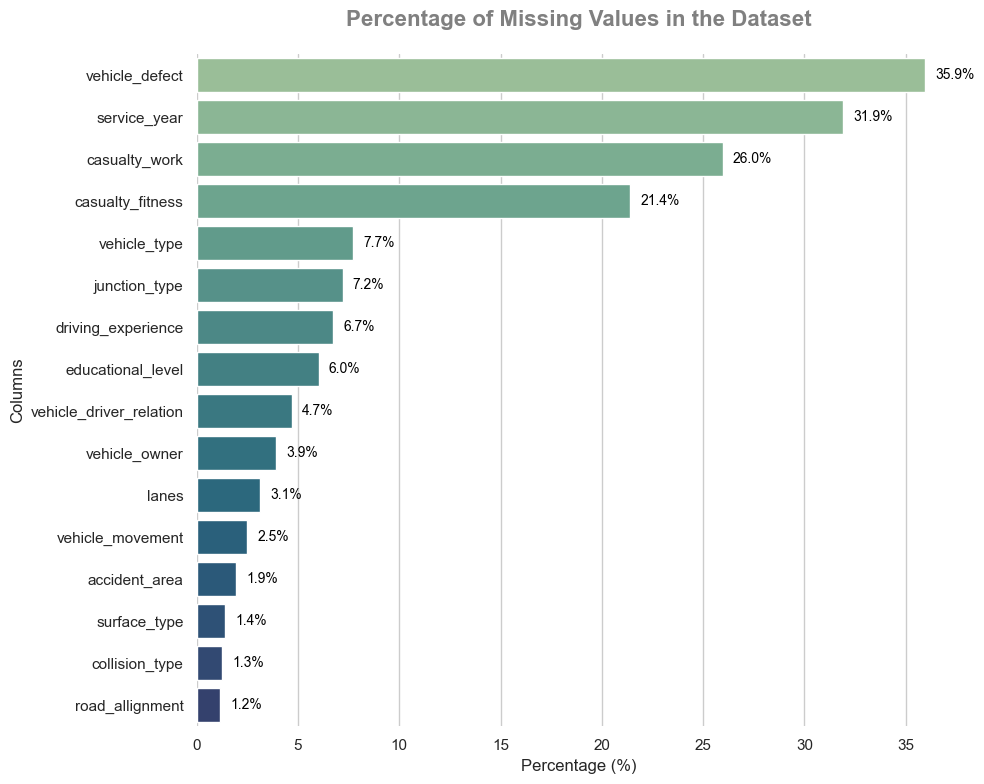

In [135]:
#plot percentage of missing data
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [136]:
#missing values in numerical data
numerical_columns=df.select_dtypes(exclude='object')
numerical_columns.isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

<b>Missingness</b>

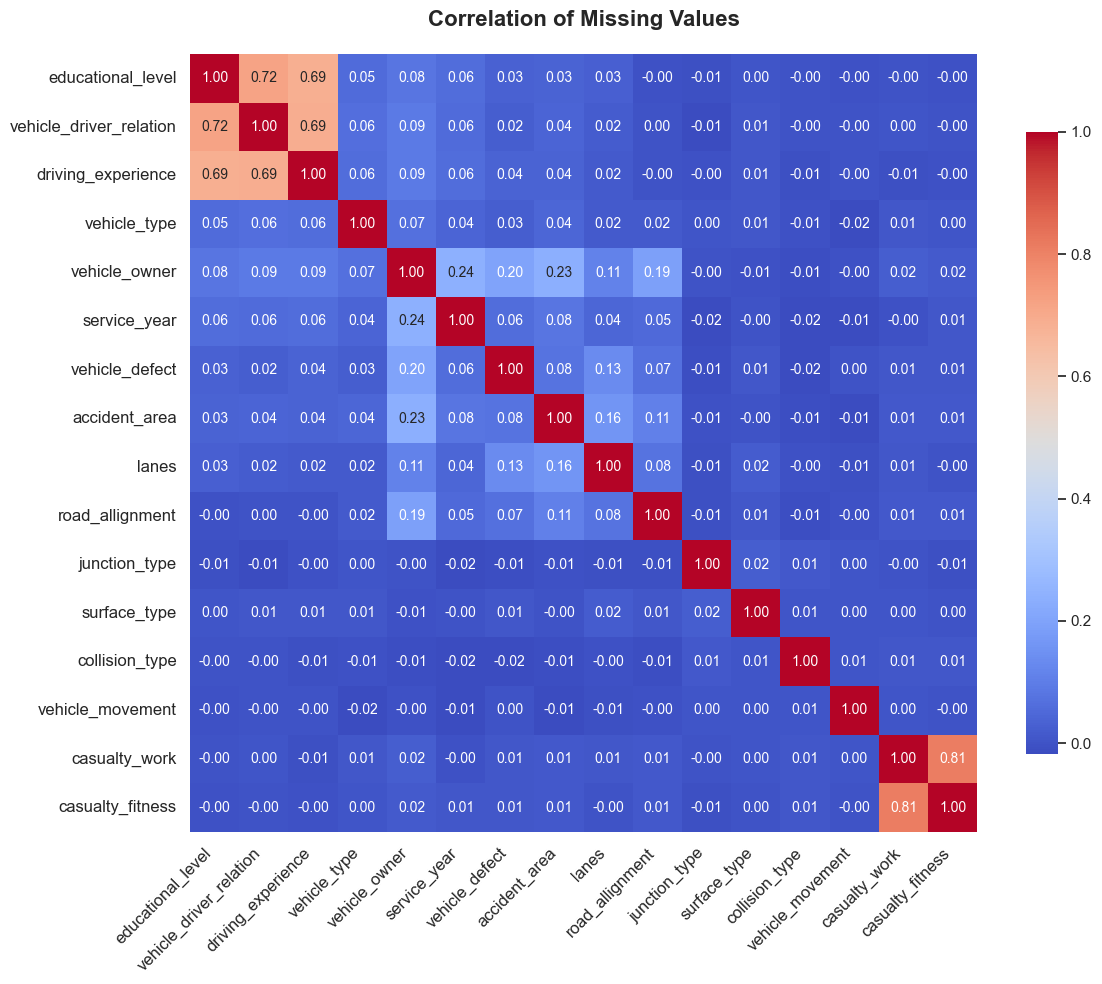

In [137]:
#check if data is missing completely at ramdom(MCAR), at random(MAR) or not at random(MNAR)
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<a id='duplicated'></a>
<b>Duplicated Values</b>
⬆️ [Tabel of Contents](#contents_tabel)

In [138]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [139]:
df.nunique().sort_values(ascending=False)

time                       1074
accident_cause               20
vehicle_type                 17
accident_area                14
vehicle_movement             13
collision_type               10
weather_condition             9
road_allignment               9
pedestrian_movement           9
junction_type                 8
casualties                    8
casualty_work                 7
lanes                         7
driving_experience            7
educational_level             7
day_of_week                   7
casualty_age                  6
vehicles_involved             6
service_year                  6
casualty_fitness              5
surface_type                  5
driver_age                    5
vehicle_driver_relation       4
vehicle_owner                 4
casualty_class                4
casualty_severity             4
light_condition               4
road_surface_conditions       4
vehicle_defect                3
driver_sex                    3
casualty_sex                  3
accident

<b>Distinct Values</b>

In [140]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns,name='Values')
pd.set_option('display.max_colwidth', None) 
styled_df = uniques_df.to_frame().style.set_properties(**{'text-align': 'left'})
styled_df

,Values
time,['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
day_of_week,['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age,['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
driver_sex,['Male' 'Female' 'Unknown']
educational_level,['Above high school' 'Junior high school' nan 'Elementary school' 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
vehicle_driver_relation,['Employee' 'Unknown' 'Owner' nan 'Other']
driving_experience,['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr' 'unknown']
vehicle_type,['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)' 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj' 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner,['Owner' 'Governmental' nan 'Organization' 'Other']
service_year,['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']


<a id='univariate'></a>
### <i>Univariate Analysis</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [141]:
#nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex','vehicle_driver_relation', 'vehicle_type','vehicle_owner', 'accident_area','lanes', 'road_allignment',
                   'junction_type', 'surface_type','road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'vehicle_movement','casualty_class', 
                   'casualty_sex', 'casualty_fitness', 'casualty_work', 'pedestrian_movement','accident_cause']
df['vehicle_defect'].replace("No defect",'0',inplace=True)
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age','casualty_severity', 'vehicle_defect','accident_severity']
len(nominal_features)+len(ordinal_features)

29

In [142]:
df['vehicle_defect'].unique()

array(['0', nan, '7', '5'], dtype=object)

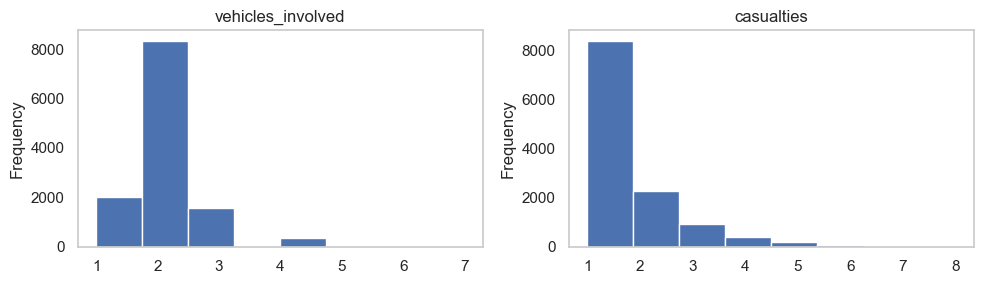

In [143]:
#distribution of numerical columns
axes=df.hist(grid=False, figsize=(10, 3),bins=8)
for ax in axes.flatten():
    # ax.set_title(f'Histogram of {ax.get_xlabel()}')
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel('Frequency')
plt.tight_layout()


<b>Skewness</b>

In [144]:
count_value= df['accident_severity'].value_counts()
proportions = count_value / count_value.sum()
print(round(proportions,2))


accident_severity
Slight Injury     0.85
Serious Injury    0.14
Fatal injury      0.01
Name: count, dtype: float64


In [145]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

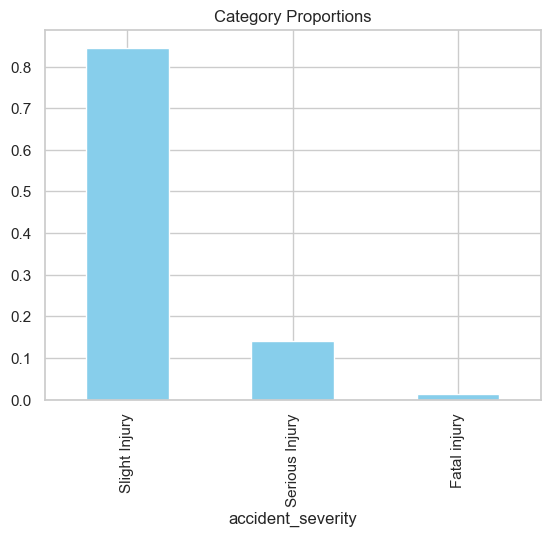

In [146]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

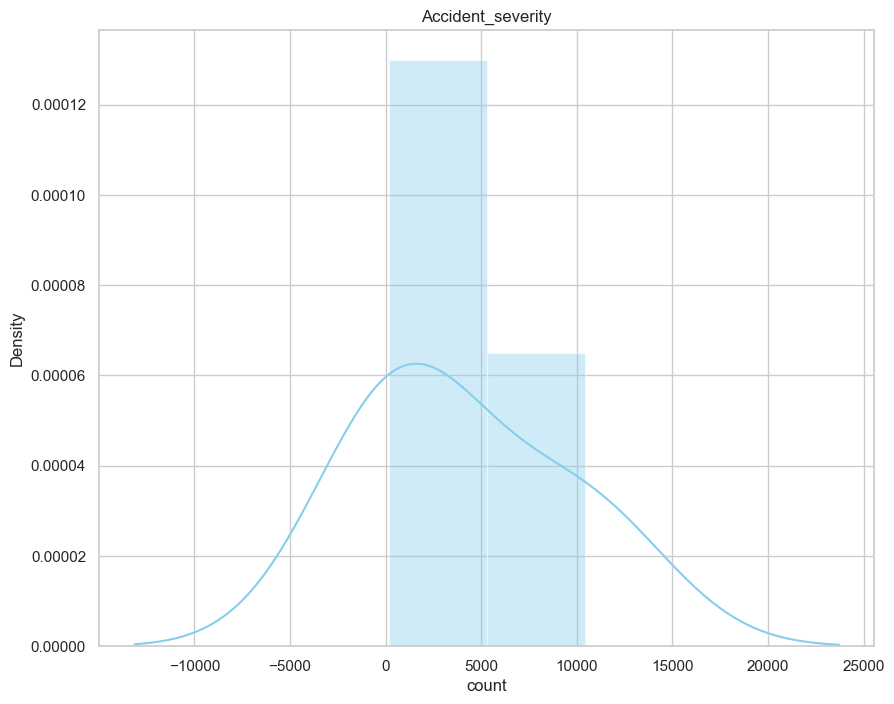

In [147]:
plt.figure(figsize= (10,8))
sns.distplot(count_value,color="skyblue")
plt.title("Accident_severity")
plt.show()

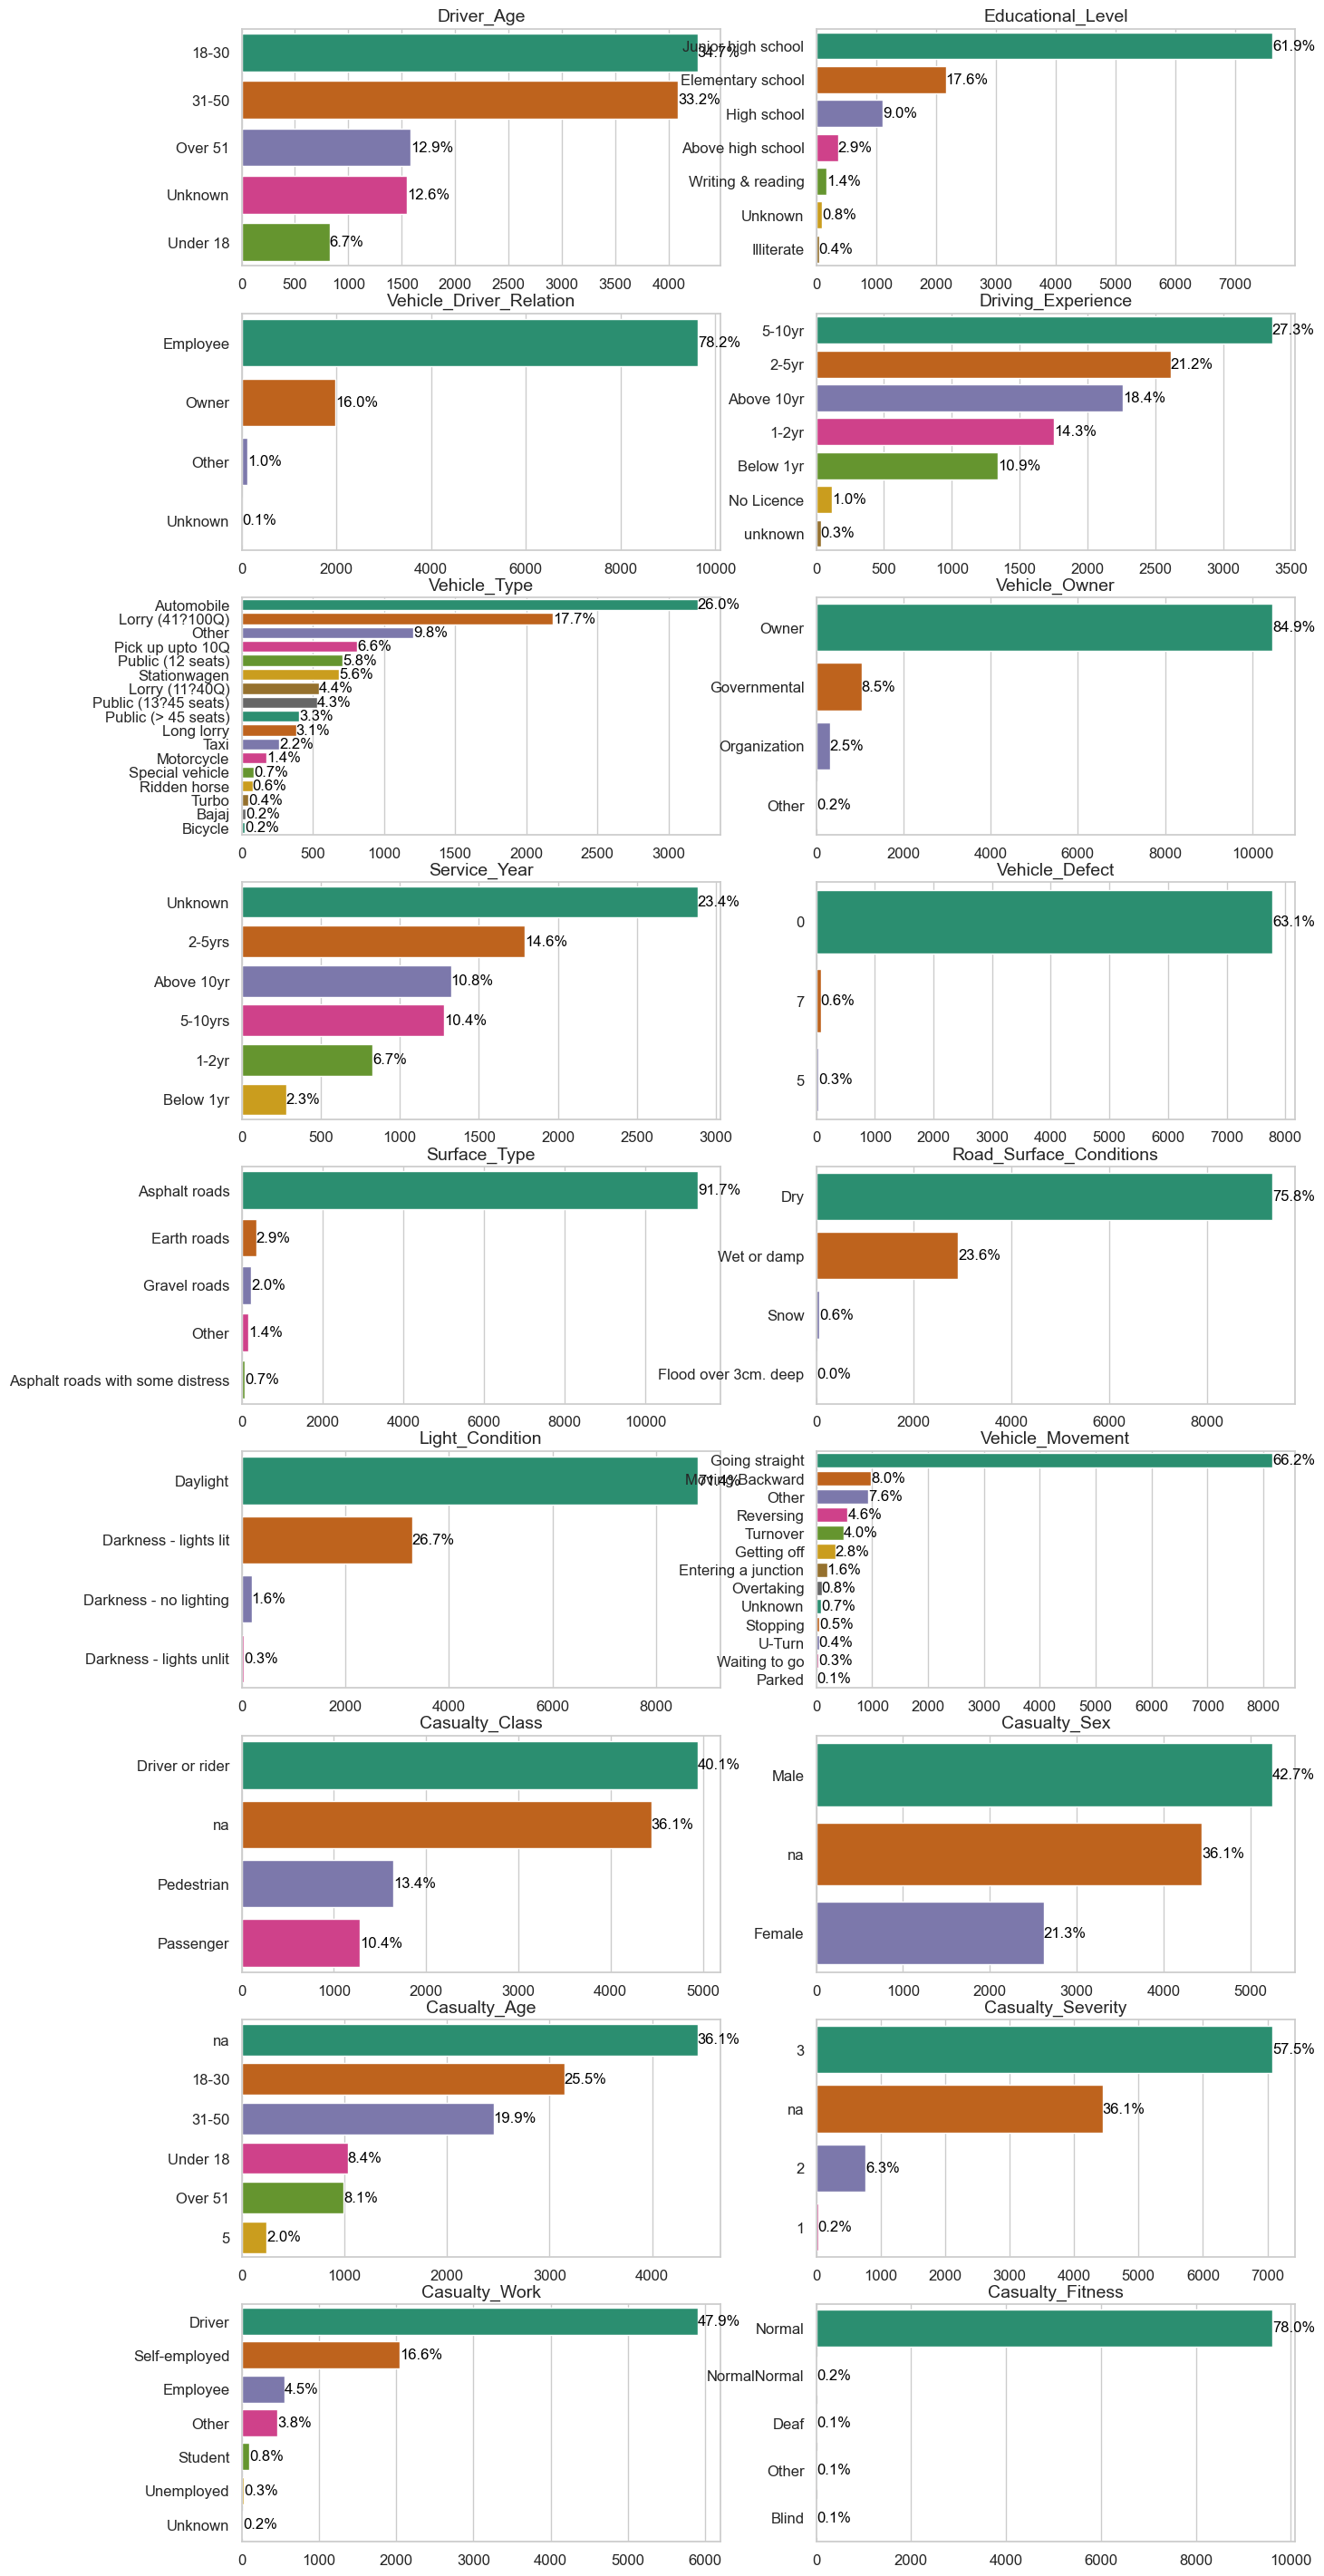

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Define the columns you want to plot (excludes the specified ones)
exclude_columns = ['time', 'lanes', 'road_allignment', 'junction_type', 
                   'weather_condition', 'pedestrian_movement', 'day_of_week', 
                   'accident_severity', 'accident_area', 'casualties', 
                   'vehicles_involved', 'accident_cause', 'driver_sex', 'collision_type']


columns_to_plot = df.drop(exclude_columns, axis=1).columns     # List of columns to plot
num_rows = (len(columns_to_plot) // 2) + (len(columns_to_plot) % 2)    # Calculate number of rows based on the number of columns to plot
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))      # Create subplots with 2 columns
axes = axes.flatten()      # Flatten to make it easy to iterate over
for i, col in enumerate(columns_to_plot):     # Loop through each column and plot
    count_plot(df, col, col.title(), ordered=True, ax=axes[i])     # Use the custom count_plot2 function on each subplot

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



#### <i>Accident distribution through out the week days<i>

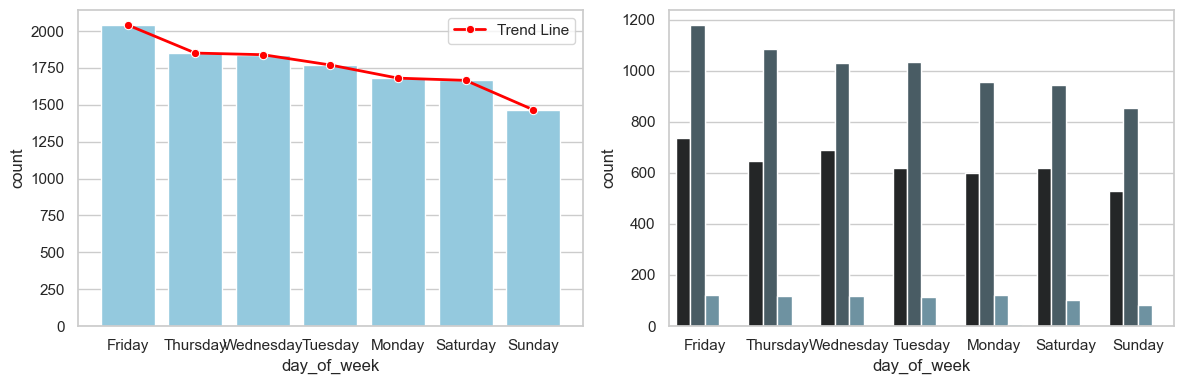

In [149]:
# Calculate value counts for accidents per day and sort them in descending order
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sorted_order = day_counts.sort_values(ascending=False).index # Sort the days based on accident count (descending order)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(data=df, x='day_of_week', ax=axes[0], order=sorted_order, color='skyblue') # Countplot ordered by accident frequency
sns.lineplot(x=sorted_order, y=day_counts[sorted_order], color='red', marker='o', label='Trend Line', linewidth=2, ax=axes[0]) # Add trend line (optional)
sns.countplot(x='day_of_week', hue='casualty_severity', data=df, order=sorted_order, ax=axes[1], palette="viridis", legend=False) # Second countplot with hue
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=sorted_order,legend=False,ax=axes[1],color='skyblue') #show the breakdown by accident severity
plt.tight_layout() # Tight layout
plt.show()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Friday is the most accident prone day of all the other days for all categories of accident severity
* The accident decreases from Friday to Thursday  then Wednesday right up to Sunday in an orderly fashion
    
</div>

#### <i>Accident distribution by hour<i>

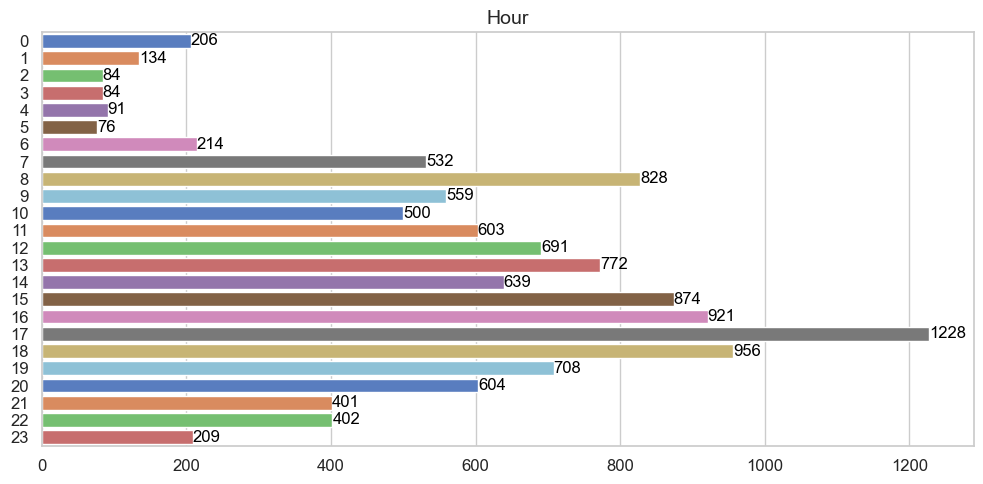

In [150]:
plt.figure(figsize=(10,5))
# hour_counts=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour.value_counts().sort_values(ascending=False).head(8)
# order=hour_counts.index
df['hour']=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour
ax=sns.countplot( data=df,y='hour',palette='muted')
# Adding annotations
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', 
            va='center', ha='left', fontsize=12, color='black')  # Display count
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
df.drop('hour', axis=1, inplace=True) # Remove the 'hour' column after plotting
plt.tight_layout()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#fAf9f6;background-color:#2c2c2c;">
<h3 align="left"><font color=#fAf9f6>💡 Observations:</font></h3>

Most accidents happen around three critical peak hours:
* 8:00  - > Typical start  of work hour for offices,industries
* 13:00  - > Typical lunch hour
* 17:00 - > Typical Exit from work hour

Least accidents happen during the night period:
* From 23:00-5:00
    
</div>

#### Accident Area

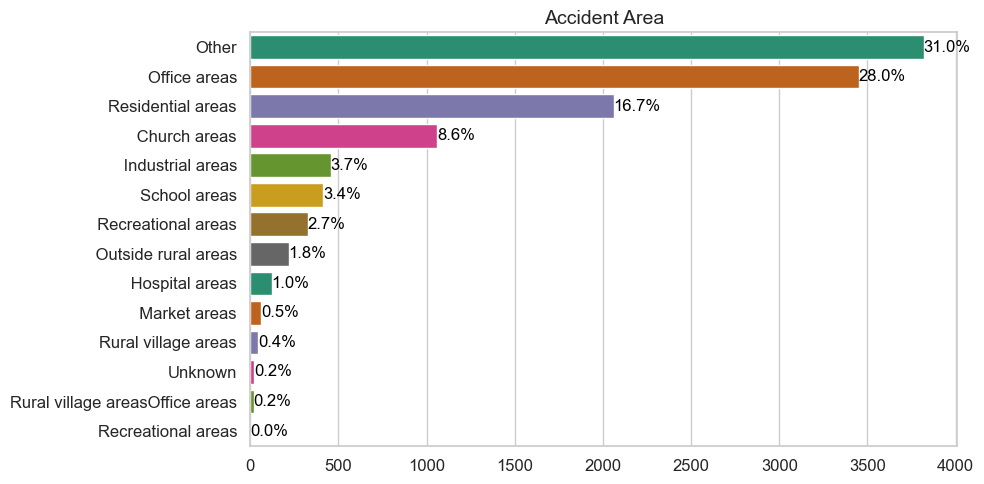

In [151]:
#Accident Area
count_plot(df,'accident_area',"Accident Area")


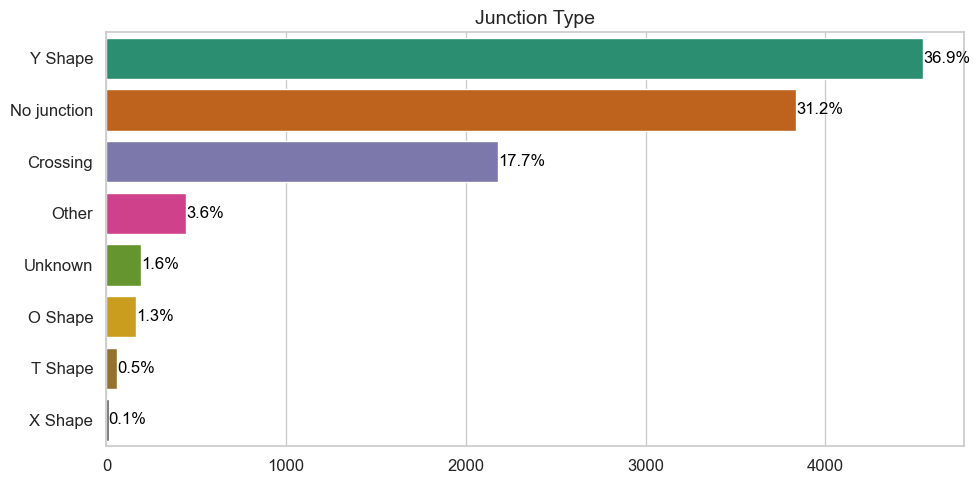

In [152]:
#Junction Type
count_plot(df,'junction_type',"Junction Type")

#### <i>Accident distribution through out the Weekends vs Weekdays<i>

<Figure size 1000x500 with 0 Axes>

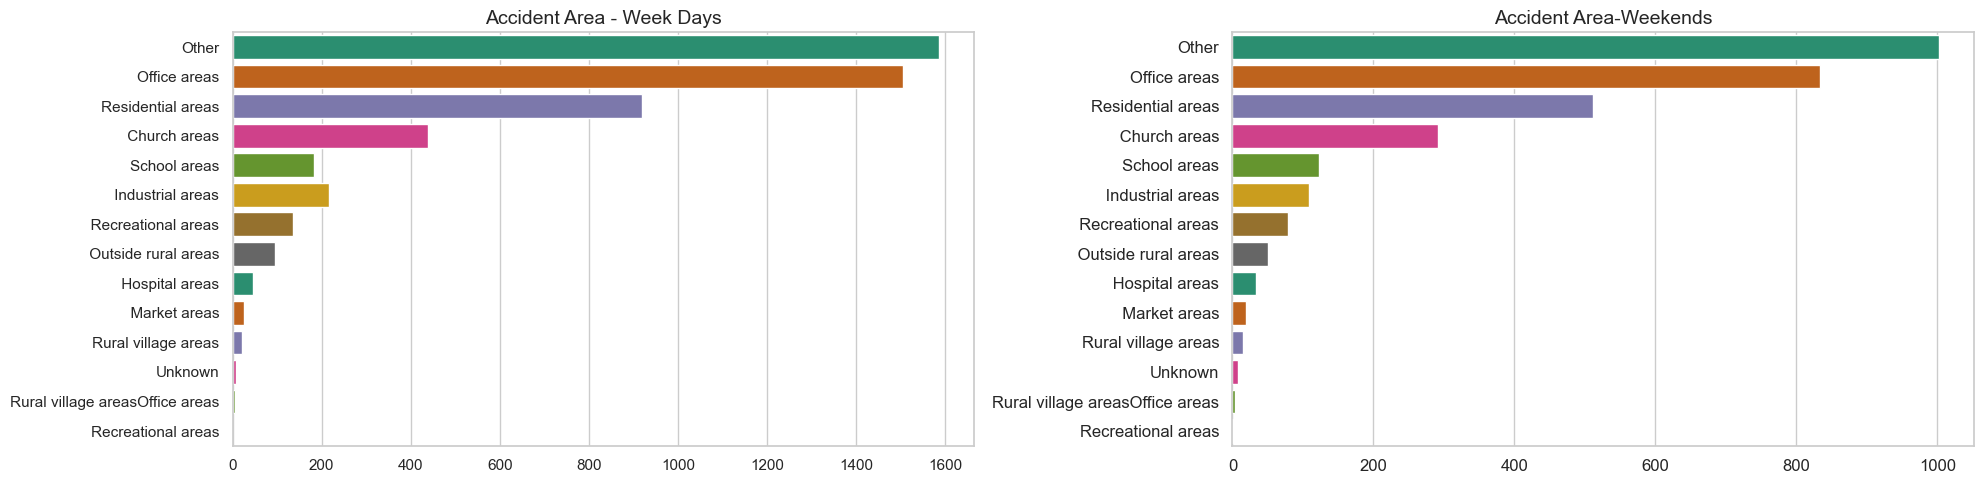

In [153]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(1,2,figsize=(20,5))
order=df['accident_area'].where(df['day_of_week'].isin(["Saturday","Sunday"])).value_counts().sort_values(ascending=False).index
weekday_df=df[df['day_of_week'].isin(["Monday","Tuesday","Wednesday","Thursady","Firday"])]
weekend_df=df[df['day_of_week'].isin(["Saturday","Sunday"])]
sns.countplot(data=weekday_df, y='accident_area', palette = 'Dark2',ax=ax[0],order=order)
ax[0].set_title('Accident Area - Week Days', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.countplot(data=weekend_df, y='accident_area', palette = 'Dark2',order=order,ax=ax[1])
ax[1].set_title('Accident Area - Weekends', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accidents vs Weather Conditions<i>

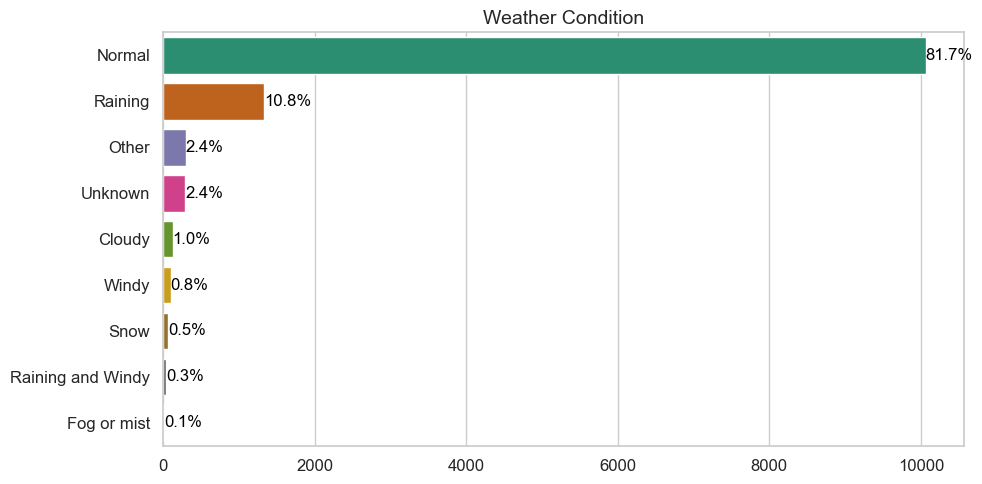

In [154]:
#Weather condition
count_plot(df,'weather_condition','Weather Condition')

#### <i>Accident per Lanes<i>

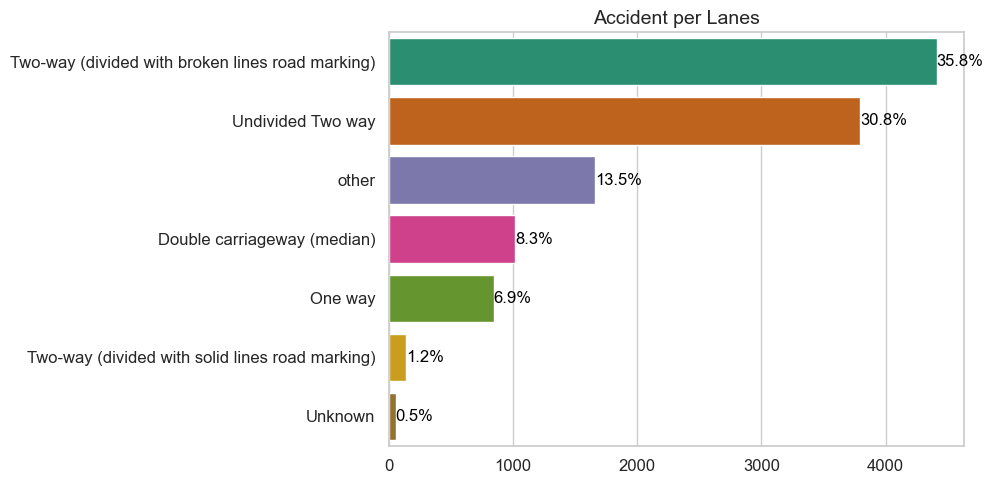

In [155]:
count_plot(df,'lanes',"Accident per Lanes")

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Lanes where most accidents occur:
* Two-way(divided with broken lines road marking)
* Undivided Two ways 
    
</div>

#### <i>Gender Constitution of Accidents<i>

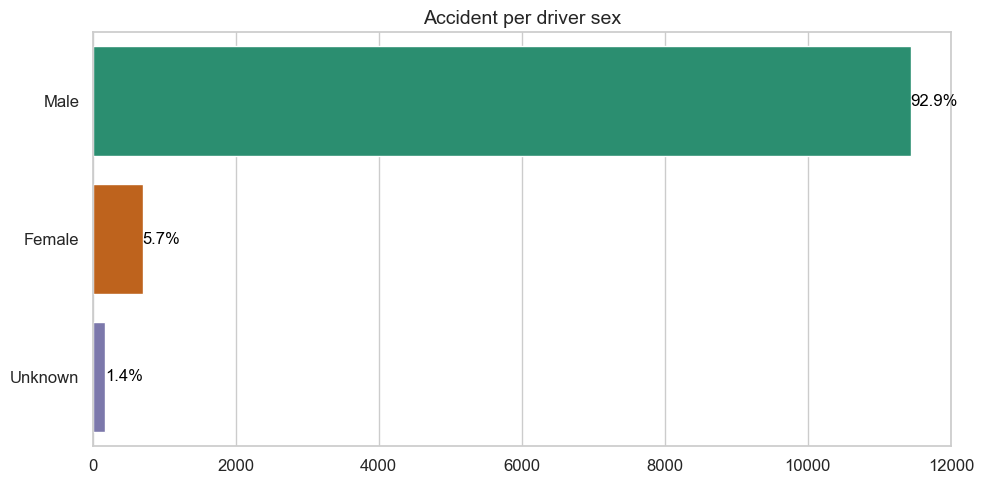

In [156]:
count_plot(df,'driver_sex','Accident per driver sex')

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Depending on the prior probability of a female driver, this may show that Male drivers are overwhelmingly prone to accident than women
    
</div>

#### <i>Age Constitution of Accidents<i>

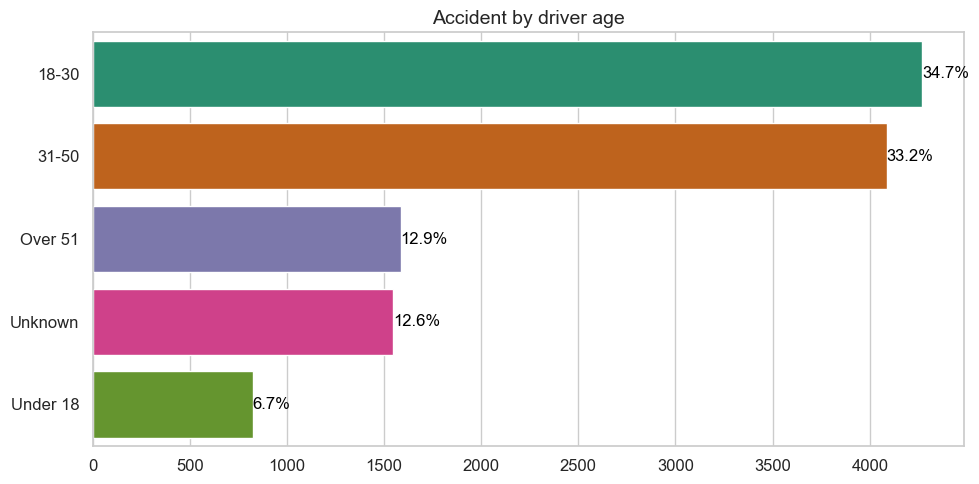

In [157]:
count_plot(df,'driver_age',"Accident by driver age")

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* As the age of the driver increases the sererity of Accident goes down ,except for the under 18's that not allowed to drive in the first place and most probably constitute an insignificant portion
    
</div>

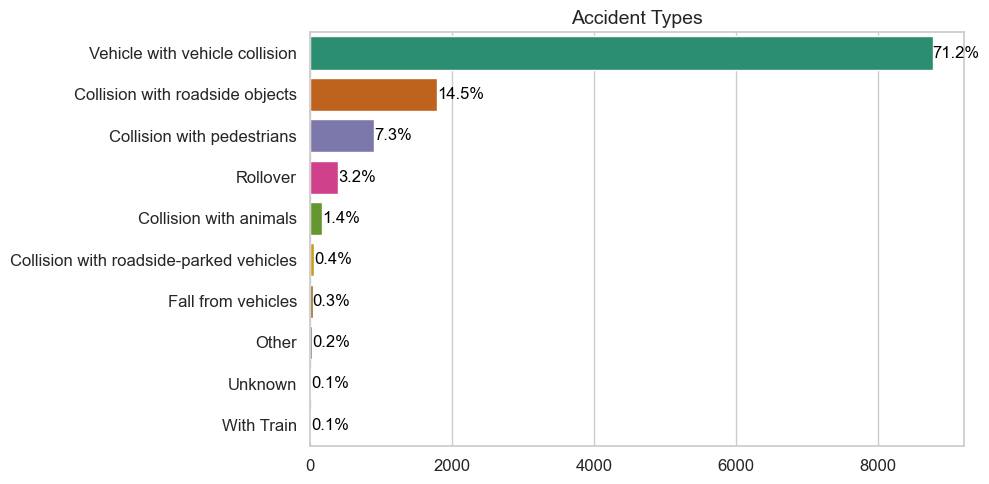

In [158]:
count_plot(df,'collision_type',"Accident Types")

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* The majority (71.2%) of accident are vehicle to vehicle collision
    
</div>

<a id='bivariate'></a>
### <i>Bivariate Analysis</i>
⬆️ [Tabel of Contents](#contents_tabel)

### Accident Severity vs. Accident Cause

In [159]:
cross_tab=cross_tab_features(df,'accident_cause','accident_severity')
cross_tab

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


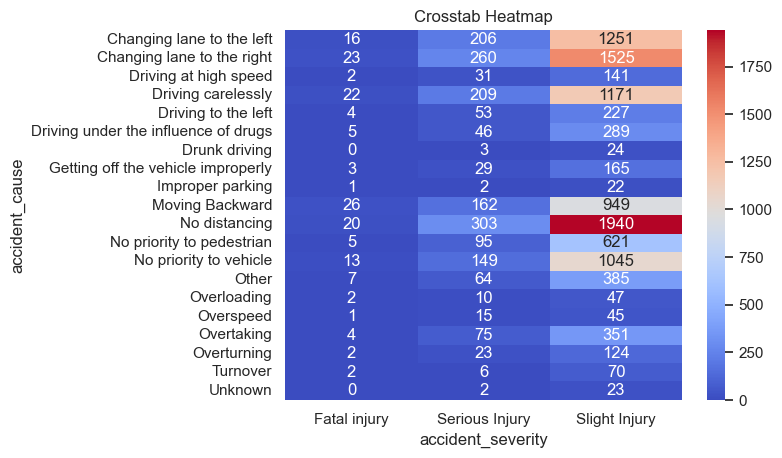

In [160]:
plot_crosstab(cross_tab)

In [161]:
cross_tab.index

Index(['Changing lane to the left', 'Changing lane to the right',
       'Driving at high speed', 'Driving carelessly', 'Driving to the left',
       'Driving under the influence of drugs', 'Drunk driving',
       'Getting off the vehicle improperly', 'Improper parking',
       'Moving Backward', 'No distancing', 'No priority to pedestrian',
       'No priority to vehicle', 'Other', 'Overloading', 'Overspeed',
       'Overtaking', 'Overturning', 'Turnover', 'Unknown', 'All'],
      dtype='object', name='accident_cause')

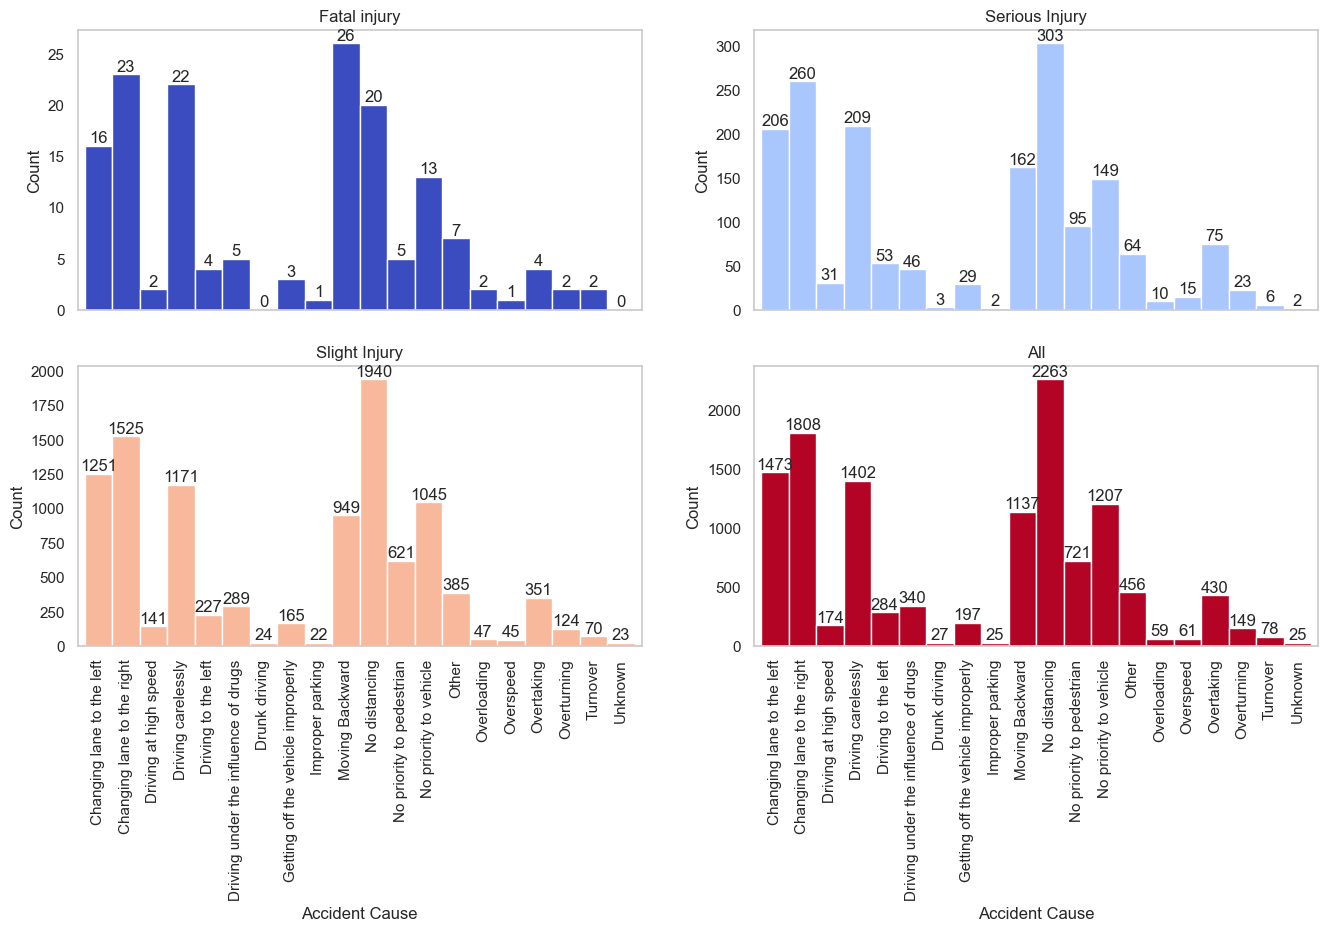

In [162]:
#plot cross tab
cross_tab=cross_tab[cross_tab.index!='All']
num_columns = len(cross_tab.columns)
rows = 2  # Number of rows
cols = (num_columns + 1) // rows  # Calculate number of columns per row

# Create subplots
axes=cross_tab.plot(
    kind='bar',
    subplots=True,
    layout=(rows, cols),
    figsize=(16, 8),
    legend=False,
    colormap='coolwarm',
    width=1,
    grid=False
)
# Annotate each bar with its value
for ax in axes.flatten():  # Flatten the axes array to iterate over it
    for container in ax.containers:  # Iterate over bar containers
        ax.bar_label(container, fmt='%.0f')  # Add integer labels to each bar

# Add titles and labels for each subplot
for i, ax in enumerate(plt.gcf().axes):
    if i < num_columns:  # Avoid extra subplots from the grid
        ax.set_title(cross_tab.columns[i])
        ax.set_ylabel('Count')
        ax.set_xlabel('Accident Cause')



<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Accident Causes:
* Changing Lanes is the most prominent cause of accidents (merging changing Lanes to the right and to the left)
* No distancing is  the second most prominent cause of accidents followed by driving carelessly and no priority to vehicles
* Improper parking,<u>Drunk driving</u>, Overloading and <u>Overspeeding</u> are the least prominent causes of Accident
    
</div>

In [163]:
cross_tab2=cross_tab_features(df,'service_year','accident_severity')
cross_tab2

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
service_year,,,,
1-2yr,9,111,707,827
2-5yrs,28,253,1511,1792
5-10yrs,16,191,1073,1280
Above 10yr,12,186,1126,1324
Below 1yr,6,43,233,282
Unknown,44,408,2431,2883
All,115,1192,7081,8388


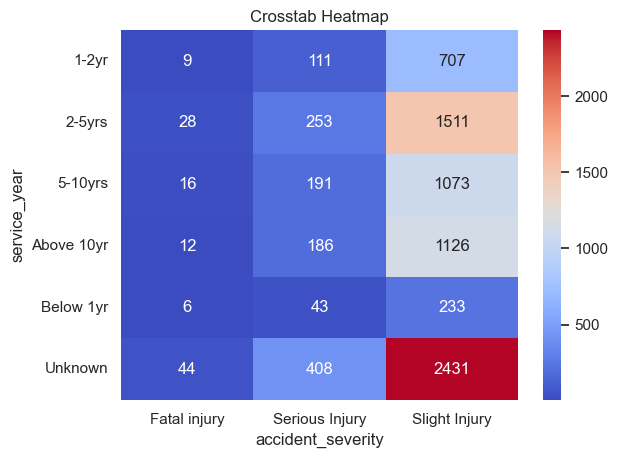

In [164]:
plot_crosstab(cross_tab2)

In [165]:
df.columns

Index(['time', 'day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

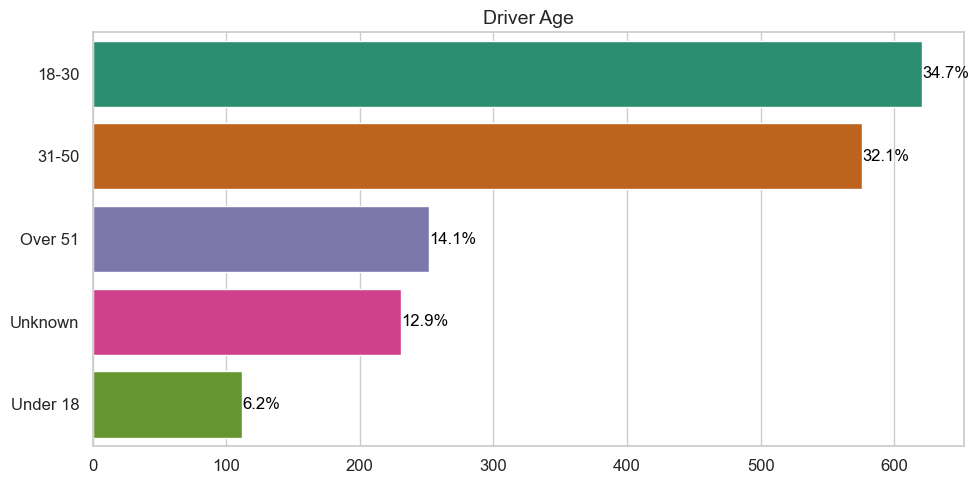

In [166]:
# looking at service_year from 2-5 yrs -what is the breakdown of this catergory like cause of accidents
count_plot(df[df['service_year']=='2-5yrs'],'driver_age',"Driver Age",ordered=True)


In [167]:
#spearman
import scipy.stats as stats
ordinal_features
Y=df['accident_severity']
for feature in ordinal_features:
    X=df[feature]
    rho, p_value = stats.spearmanr(X, Y)
    print(feature, rho,p_value)

driver_age 0.002628846909977342 0.7705055448301616
educational_level nan nan
driving_experience nan nan
service_year nan nan
casualty_age 0.024135080273840412 0.007393759605450161
casualty_severity 0.00694870149898055 0.4406592859414391
vehicle_defect nan nan
accident_severity 1.0 0.0


### <i>Multivariate Analysis</i>

<a id='preprocessing'></a>
# Preprocessing
⬆️ [Tabel of Contents](#contents_tabel)

### <i>Data Cleaning</i>

In [168]:
#copy data before any manipulation
df2=df.copy(deep=True)

<b>Converting values to numbers</b>

In [169]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head()
#drop the time feature
df2.drop(columns=['time'],inplace=True)
#vehicle defects

df2.dtypes

day_of_week                object
driver_age                 object
driver_sex                 object
educational_level          object
vehicle_driver_relation    object
driving_experience         object
vehicle_type               object
vehicle_owner              object
service_year               object
vehicle_defect             object
accident_area              object
lanes                      object
road_allignment            object
junction_type              object
surface_type               object
road_surface_conditions    object
light_condition            object
weather_condition          object
collision_type             object
vehicles_involved           int64
casualties                  int64
vehicle_movement           object
casualty_class             object
casualty_sex               object
casualty_age               object
casualty_severity          object
casualty_work              object
casualty_fitness           object
pedestrian_movement        object
accident_cause

In [170]:
#replace unknown, Unknown and na with np.nan
df2.replace(['na','unknown','Unknown'], np.nan, inplace=True)
for col in df2:
    print(df2[col].unique())

['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
['0' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational areas']


**Encoding**


In [171]:
#inspect ordinal feature values
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
casualty_severity  :  ['na' '3' '2' '1']
vehicle_defect  :  ['0' nan '7' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [172]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [173]:
#Create mappings and encode nominal features  in place
mappings = {}
for feature in nominal_features:
    unique_values = df2[feature].dropna().unique()
    mappings[feature] = {
        "original": {val: idx for idx, val in enumerate(unique_values)},
        "reverse": {idx: val for idx, val in enumerate(unique_values)}
    }
    df2[feature] = df2[feature].map(mappings[feature]["original"])
    df2.sample(10)


In [174]:
ordinal_features

['driver_age',
 'educational_level',
 'driving_experience',
 'service_year',
 'casualty_age',
 'casualty_severity',
 'vehicle_defect',
 'accident_severity']

In [175]:
#Ordinal Encoding

df2[ordinal_features] = df2[ordinal_features].fillna('missing')
#dictate the order of values
category_order=[
['Under 18','18-30', '31-50', 'Over 51',  'missing'],
['Illiterate','Writing & reading','Elementary school', 'Junior high school','High school','Above high school', 'missing'],
['No Licence','Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr','missing'],
['Below 1yr','1-2yr', '2-5yrs', '5-10yrs', 'Above 10yr',  'missing'],
['Under 18','18-30', '31-50', 'Over 51','5', 'missing'],
['1','2','3','missing'],
['0','5','7','missing'],
['Slight Injury', 'Serious Injury' ,'Fatal injury']
]
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=category_order)
df2[ordinal_features]=encoder.fit_transform(df2[ordinal_features])
missing_encoded_value = encoder.transform([['missing'] * len(ordinal_features)])[0]
for i, col in enumerate(ordinal_features):
     df2[col] = df2[col].replace(missing_encoded_value[i], np.nan)
encoded_df=df2.copy(deep=True)

encoded_df.sample(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
3392,5,1.0,0.0,3.0,0.0,1.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,8.0,0.0,8,45
4292,3,0.0,0.0,3.0,0.0,2.0,NaN,0.0,NaN,0.0,...,0.0,2.0,2.0,3.0,0.0,0,7.0,0.0,0,29
5023,1,1.0,0.0,3.0,0.0,3.0,8.0,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,5.0,0.0,20,53
4116,2,NaN,0.0,5.0,1.0,3.0,2.0,0.0,3.0,NaN,...,0.0,0.0,2.0,4.0,0.0,0,3.0,0.0,13,0
590,6,2.0,0.0,NaN,1.0,1.0,8.0,0.0,NaN,0.0,...,0.0,0.0,2.0,NaN,NaN,0,12.0,0.0,17,23


In [176]:
# Check the mappings
for feature, categories in zip(ordinal_features, encoder.categories_):
    print(f"Feature: {feature}")
    print(f"{dict(zip(categories, range(len(categories))))}")

Feature: driver_age
{'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'missing': 4}
Feature: educational_level
{'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2, 'Junior high school': 3, 'High school': 4, 'Above high school': 5, 'missing': 6}
Feature: driving_experience
{'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5, 'missing': 6}
Feature: service_year
{'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3, 'Above 10yr': 4, 'missing': 5}
Feature: casualty_age
{'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'missing': 5}
Feature: casualty_severity
{'1': 0, '2': 1, '3': 2, 'missing': 3}
Feature: vehicle_defect
{'0': 0, '5': 1, '7': 2, 'missing': 3}
Feature: accident_severity
{'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}


<a id='imputation'></a>
### Impute Missing Values
⬆️ [Tabel of Contents](#contents_tabel)

In [177]:
# imputed iteratively using Random Forest Classiffier as an estimator
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(encoded_df)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.sample(5)


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
665,2.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,6.0,26.0
8134,2.0,2.0,0.0,2.0,0.0,1.0,6.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,8.0,0.0,14.0,0.0
11931,2.0,3.0,0.0,3.0,0.0,4.0,0.0,0.0,2.0,0.0,...,0.0,1.0,2.0,4.0,0.0,0.0,12.0,0.0,13.0,53.0
4016,4.0,0.0,0.0,4.0,0.0,5.0,11.0,0.0,2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,12.0,0.0,8.0,56.0
7486,0.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0,16.0,45.0


In [178]:
for feature in imputed_df:
    print( feature ," :",len(imputed_df[feature].unique()))

day_of_week  : 7
driver_age  : 4
driver_sex  : 2
educational_level  : 6
vehicle_driver_relation  : 3
driving_experience  : 6
vehicle_type  : 17
vehicle_owner  : 4
service_year  : 5
vehicle_defect  : 3
accident_area  : 13
lanes  : 6
road_allignment  : 9
junction_type  : 7
surface_type  : 5
road_surface_conditions  : 4
light_condition  : 4
weather_condition  : 8
collision_type  : 9
vehicles_involved  : 6
casualties  : 8
vehicle_movement  : 12
casualty_class  : 3
casualty_sex  : 2
casualty_age  : 5
casualty_severity  : 3
casualty_work  : 6
casualty_fitness  : 5
pedestrian_movement  : 9
accident_cause  : 19
accident_severity  : 3
hour  : 24
minute  : 60


In [179]:
#decoding nominal features
ndecoded_df=imputed_df.copy(deep=True)
for feature in nominal_features:
    reverse_map = mappings[feature]["reverse"]
    valid_values = list(reverse_map.keys())
  
    # Round imputed values to the nearest valid integer
    ndecoded_df[feature] = ndecoded_df[feature].apply(
        lambda x: min(valid_values, key=lambda y: abs(x - y))
    )
    # Decode back to original categories
    ndecoded_df[feature] = ndecoded_df[feature].map(reverse_map)

ndecoded_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
3738,Wednesday,2.0,Male,3.0,Employee,4.0,Automobile,Owner,3.0,0.0,...,Male,1.0,2.0,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,0.0,14.0,23.0
12185,Thursday,2.0,Male,2.0,Employee,4.0,Automobile,Owner,2.0,0.0,...,Male,1.0,2.0,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,1.0,17.0,21.0
4496,Saturday,2.0,Male,2.0,Other,4.0,Pick up upto 10Q,Owner,2.0,0.0,...,Female,1.0,2.0,Driver,Normal,Not a Pedestrian,Overtaking,0.0,8.0,9.0
8543,Sunday,3.0,Male,4.0,Owner,2.0,Lorry (41?100Q),Owner,2.0,0.0,...,Male,1.0,2.0,Driver,Normal,Not a Pedestrian,No priority to pedestrian,0.0,17.0,0.0
4055,Tuesday,1.0,Male,3.0,Employee,3.0,Automobile,Owner,1.0,0.0,...,Male,4.0,2.0,Driver,Blind,Not a Pedestrian,No priority to vehicle,0.0,15.0,55.0
11544,Wednesday,2.0,Male,3.0,Employee,3.0,Automobile,Owner,4.0,0.0,...,Male,1.0,2.0,Driver,Normal,Not a Pedestrian,Driving carelessly,0.0,16.0,15.0
11990,Saturday,1.0,Male,4.0,Employee,4.0,Automobile,Owner,1.0,0.0,...,Male,2.0,2.0,Self-employed,Normal,Not a Pedestrian,Moving Backward,1.0,2.0,10.0
3083,Monday,0.0,Male,3.0,Employee,4.0,Stationwagen,Owner,2.0,0.0,...,Female,2.0,2.0,Self-employed,Normal,Not a Pedestrian,Moving Backward,0.0,22.0,20.0
2468,Monday,1.0,Male,3.0,Employee,5.0,Automobile,Owner,3.0,0.0,...,Male,1.0,2.0,Driver,Normal,Not a Pedestrian,No distancing,0.0,18.0,55.0
11866,Monday,2.0,Male,3.0,Employee,4.0,Pick up upto 10Q,Owner,2.0,0.0,...,Male,2.0,2.0,Self-employed,Normal,Not a Pedestrian,No distancing,0.0,15.0,25.0


In [180]:
# Decode Ordinal Features
ordinal_decoded = encoder.inverse_transform(ndecoded_df[ordinal_features])
for i, col in enumerate(ordinal_features):
    ndecoded_df[col] = ordinal_decoded[:, i]
ndecoded_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
3119,Friday,18-30,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,2-5yrs,0,...,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury,6.0,47.0
10262,Saturday,18-30,Male,Junior high school,Employee,Above 10yr,Public (12 seats),Owner,5-10yrs,0,...,Male,18-30,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,20.0,46.0
5091,Friday,31-50,Male,Junior high school,Employee,5-10yr,Pick up upto 10Q,Governmental,2-5yrs,0,...,Male,18-30,3,Employee,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury,9.0,28.0
357,Thursday,18-30,Male,High school,Employee,2-5yr,Automobile,Owner,2-5yrs,0,...,Male,31-50,2,Driver,Normal,Not a Pedestrian,Overturning,Slight Injury,21.0,25.0
9155,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Special vehicle,Governmental,5-10yrs,0,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,2.0,30.0
3150,Saturday,18-30,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Owner,2-5yrs,0,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,12.0,20.0
2682,Friday,18-30,Male,Above high school,Employee,Above 10yr,Automobile,Owner,1-2yr,5,...,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,9.0,30.0
9008,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Public (> 45 seats),Owner,2-5yrs,0,...,Female,18-30,2,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,15.0,15.0
11314,Saturday,18-30,Female,High school,Owner,Above 10yr,Other,Owner,2-5yrs,0,...,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,21.0,55.0
1368,Monday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,2-5yrs,0,...,Male,Over 51,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,18.0,9.0


In [181]:
#check correct decoding
ndecoded_df['casualty_class'].isna().sum()
for col in ndecoded_df:
    print(col ," : ",ndecoded_df[col].unique())
imputed_decoded_df=ndecoded_df.copy(deep=True)

day_of_week  :  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51']
driver_sex  :  ['Male' 'Female']
educational_level  :  ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
vehicle_driver_relation  :  ['Employee' 'Owner' 'Other']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
vehicle_type  :  ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner  :  ['Owner' 'Governmental' 'Organization' 'Other']
service_year  :  ['Above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'Below 1yr']
vehicle_defect  :  ['0' '7' '5']
accident_area  :  ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' '

In [182]:
#save imputed_data
cleaned_df=imputed_decoded_df.copy(deep=True)
folder_path = "data"
file_name = "cleaned_data.csv" # Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, file_name) # Full path to the CSV file
cleaned_df.to_csv(file_path, index=False) # Save DataFrame to CSV (replace if it already exists)
print(f"File saved at: {file_path}")

File saved at: data\cleaned_data.csv


### Spearman’s Rank Correlation

In [183]:
#spearman
import scipy.stats as stats
coeff=pd.DataFrame(columns=["rho","p_value"])
Y=imputed_df['accident_severity']
for feature in ordinal_features:
    X=imputed_df[feature]
    rho, p_value = stats.spearmanr(X, Y)
    coeff.loc[feature]=[rho,p_value]
coeff

,rho,p_value
driver_age,-0.008051,0.371647
educational_level,-0.002709,0.763683
driving_experience,0.003426,0.703817
service_year,0.001077,0.904831
casualty_age,0.003540,0.694447
casualty_severity,0.010897,0.226587
vehicle_defect,0.005817,0.518580
accident_severity,1.000000,0.000000


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Ordinal Features correlation with Accident Severity:
* Driver Age (-0.008) and Educational Level (-0.0027) have very weak negative correlations with accinent severity.
* Driving Experience (0.0036) and Casualty Age (0.0031) have very weak positive correlations.
* The correlation values are close to zero, suggesting that there is no strong monotonic relationship with the respective variable.
* For driver_age, educational_level, driving_experience, service_year, and casualty_age, the p-values are greater than 0.05, which means none of these relationships are statistically significant.
    
</div>

<a id='transform'></a>
### <i>Data Transformation</i>
⬆️ [Tabel of Contents](#contents_tabel)

#### Time Feature Transformation

In [184]:
# Cyclical Encoding of Time Features
transformed_df=imputed_df.copy(deep=True)
transformed_df['fractional_hour']=transformed_df['hour']+transformed_df['minute']/60  #merge hour and minute for better granularity
transformed_df['hour_sin'] = np.sin(2 * np.pi * transformed_df['fractional_hour'] / 24)
transformed_df['hour_cos'] = np.cos(2 * np.pi * transformed_df['fractional_hour'] / 24)
transformed_df=transformed_df.drop(columns=['fractional_hour','hour','minute'])
transformed_df


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour_sin,hour_cos
0,0.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,4.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.968148,-2.503800e-01
1,0.0,2.0,0.0,3.0,0.0,5.0,1.0,0.0,3.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,-0.968148,-2.503800e-01
2,0.0,1.0,0.0,3.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,-0.968148,-2.503800e-01
3,1.0,1.0,0.0,3.0,0.0,4.0,1.0,1.0,2.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.284015,9.588197e-01
4,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.284015,9.588197e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,3.0,2.0,0.0,3.0,0.0,3.0,4.0,0.0,2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,8.0,0.0,-0.896873,-4.422887e-01
12312,1.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,8.0,0.0,-1.000000,-1.836970e-16
12313,1.0,3.0,0.0,3.0,0.0,4.0,12.0,0.0,2.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,3.0,1.0,-0.480989,-8.767268e-01
12314,1.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,17.0,0.0,-0.480989,-8.767268e-01


#### Standardization

In [185]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(transformed_df)
scaled_df=pd.DataFrame(scaled_data,columns=transformed_df.columns)
scaled_df


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour_sin,hour_cos
0,-1.546724,-0.704984,-0.245668,3.017225,-0.439989,-1.031376,-0.942244,-0.329290,2.075206,-0.092262,...,-0.519822,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,-1.404000,-0.411709,-0.984119,0.002024
1,-1.546724,0.547552,-0.245668,0.096748,-0.439989,1.311957,-0.702046,-0.329290,0.890748,-0.092262,...,-0.519822,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,-1.180634,-0.411709,-0.984119,0.002024
2,-1.546724,-0.704984,-0.245668,0.096748,-0.439989,-1.031376,-0.461848,-0.329290,-0.293710,-0.092262,...,-0.519822,0.807695,0.258974,-0.554612,-0.070489,-0.252962,-0.957268,2.050948,-0.984119,0.002024
3,-1.040198,-0.704984,-0.245668,0.096748,-0.439989,0.530846,-0.702046,2.013598,-0.293710,-0.092262,...,1.923737,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,-0.733902,-0.411709,0.862174,1.947572
4,-1.040198,-0.704984,-0.245668,0.096748,-0.439989,-0.250265,-0.942244,-0.329290,0.890748,-0.092262,...,-0.519822,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,-1.180634,-0.411709,0.862174,1.947572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,-0.027144,0.547552,-0.245668,0.096748,-0.439989,-0.250265,0.018547,-0.329290,-0.293710,-0.092262,...,-0.519822,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,0.382929,-0.411709,-0.879025,-0.306748
12312,-1.040198,-0.704984,-0.245668,-1.363490,-0.439989,0.530846,-0.942244,-0.329290,-0.293710,-0.092262,...,-0.519822,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,0.382929,-0.411709,-1.031085,0.404874
12313,-1.040198,1.800088,-0.245668,0.096748,-0.439989,0.530846,1.940129,-0.329290,-0.293710,-0.092262,...,-0.519822,0.807695,0.258974,-0.554612,-0.070489,-0.252962,-0.733902,2.050948,-0.265811,-1.005740
12314,-1.040198,-0.704984,4.070527,0.096748,-0.439989,1.311957,-0.461848,-0.329290,-0.293710,-0.092262,...,-0.519822,-0.412118,0.258974,-0.554612,-0.070489,-0.252962,2.393224,-0.411709,-0.265811,-1.005740


<a id='reduce'></a>
### <i>Data Reduction</i>
⬆️ [Tabel of Contents](#contents_tabel)

### Attribute Subset Selection Using Filter Methods

#### Mutual Information

In [186]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
target = "accident_severity"
mi = mutual_info_classif(transformed_df.drop(columns=[target,*numerical_columns]), transformed_df["accident_severity"], discrete_features=True)
mi_scaled = MinMaxScaler().fit_transform(mi.reshape(-1, 1)).flatten() # Normalize MI values
mi_df = pd.DataFrame({
    'Feature': transformed_df.drop(columns=[target,*numerical_columns]).columns,
    'Mutual Information': mi_scaled
})
mi_df.sort_values(by='Mutual Information',ascending=False)

,Feature,Mutual Information
28,hour_sin,1.000000
29,hour_cos,0.994787
13,junction_type,0.021626
17,weather_condition,0.014466
27,accident_cause,0.013943
6,vehicle_type,0.013749
0,day_of_week,0.013517
10,accident_area,0.012779
16,light_condition,0.012267
1,driver_age,0.011525


In [187]:
#Features with MI score greater than 0.01
mi_df[mi_df['Mutual Information']>0.01].sort_values(by='Mutual Information',ascending=False)

,Feature,Mutual Information
28,hour_sin,1.000000
29,hour_cos,0.994787
13,junction_type,0.021626
17,weather_condition,0.014466
27,accident_cause,0.013943
6,vehicle_type,0.013749
0,day_of_week,0.013517
10,accident_area,0.012779
16,light_condition,0.012267
1,driver_age,0.011525


In [188]:
#Features with MI score less than 0.01
mi_df[mi_df['Mutual Information']<0.01].sort_values(by='Mutual Information',ascending=False)

,Feature,Mutual Information
5,driving_experience,0.006052
18,collision_type,0.005663
26,pedestrian_movement,0.004952
19,vehicle_movement,0.004827
14,surface_type,0.004033
12,road_allignment,0.003787
11,lanes,0.003503
24,casualty_work,0.003157
22,casualty_age,0.003131
15,road_surface_conditions,0.002095


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Mutual Information Scores can be used to drop columns with low scoe:
* Casualty Sex - has zero mutual info with the target thus can be dropped
* Features that have MI score less than 0.01 could also be dropped with out a significant loss in information
    
</div>

In [189]:
transformed_df.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity', 'hour_sin', 'hour_cos'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

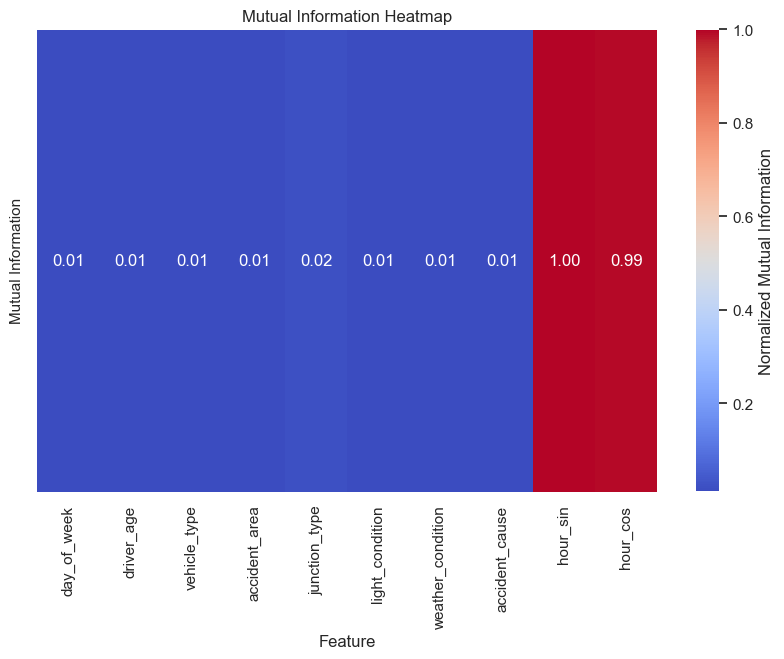

In [190]:
#Visualize the MI
plt.figure(figsize=(20,10))
# Prepare DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': transformed_df.drop(columns=[target,*numerical_columns]).columns,
    'Mutual Information': mi_scaled
})

# Filter out low MI features
mi_df = mi_df[mi_df['Mutual Information'] > 0.01]

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    mi_df.set_index('Feature').T,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Mutual Information'}
)
plt.title("Mutual Information Heatmap")
plt.show()


### Attribue Subset Selection Using Embbeded Methods

#### Random Forest

In [191]:
rf=RandomForestClassifier()
X=transformed_df.drop(columns=['accident_severity'])
Y=transformed_df['accident_severity']
rf.fit(X,Y)
feature_importance=rf.feature_importances_
importance_df=pd.DataFrame({"Feature":X.columns,"Importance":feature_importance})


In [192]:
importance_df.sort_values(by='Importance',ascending=False)

,Feature,Importance
31,hour_cos,0.111931
30,hour_sin,0.107524
29,accident_cause,0.060820
0,day_of_week,0.054117
6,vehicle_type,0.052525
10,accident_area,0.046276
5,driving_experience,0.042284
19,vehicles_involved,0.041797
11,lanes,0.035560
13,junction_type,0.034533


In [193]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features:", rfecv.n_features_)
selected_features = X.columns[rfecv.support_]


Optimal number of features: 18


In [194]:
features_to_exclude=list(importance_df.loc[26:,'Feature'])
reduced_df=transformed_df.drop(columns=features_to_exclude)

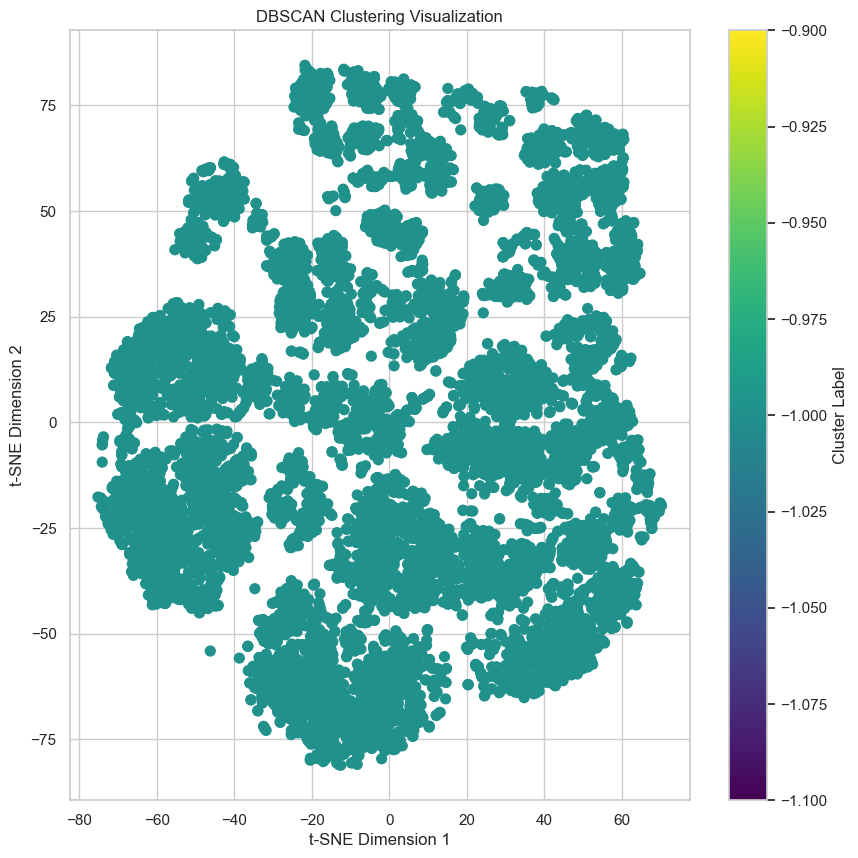

In [195]:
# DBSCAN parameters
eps = 0.5  # Maximum distance between two samples to be considered in the same neighborhood
min_samples = 5  # Minimum number of samples to form a dense region

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(reduced_df)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(reduced_df)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

<a id='insight'></a>
# Insights and Recommendations
⬆️ [Tabel of Contents](#contents_tabel)